In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

In [26]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/titanic_train.csv")
test = pd.read_csv("/content/drive/MyDrive/titanic_train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,332,1,male,45.5,0,0,113043,28.5000,S,0
1,734,2,male,23.0,0,0,28425,13.0000,S,0
2,383,3,male,32.0,0,0,STON/O 2. 3101293,7.9250,S,0
3,705,3,male,26.0,1,0,350025,7.8542,S,0
4,814,3,female,6.0,4,2,347082,31.2750,S,0
...,...,...,...,...,...,...,...,...,...,...
707,107,3,female,21.0,0,0,343120,7.6500,S,1
708,271,1,male,NaN,0,0,113798,31.0000,S,0
709,861,3,male,41.0,2,0,350026,14.1083,S,0
710,436,1,female,14.0,1,2,113760,120.0000,S,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex          712 non-null    object 
 3   Age          572 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Ticket       712 non-null    object 
 7   Fare         712 non-null    float64
 8   Embarked     710 non-null    object 
 9   Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 55.8+ KB


In [27]:
df = df.drop(columns=['Cabin', 'Unnamed: 0','Name'])

In [30]:
df['Age'].describe()

count    572.000000
mean      29.498846
std       14.500059
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

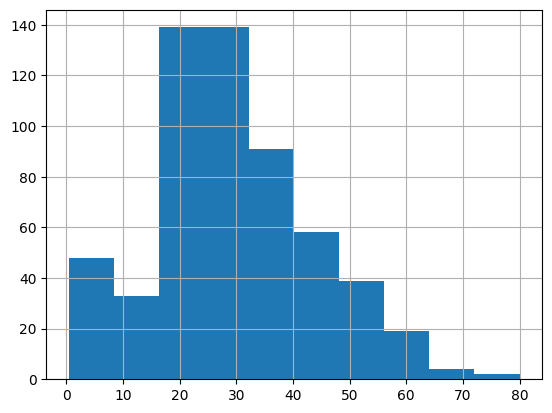

In [32]:
df['Age'].hist()

In [33]:
labelencoder = LabelEncoder()

df_le = df.copy()

df_le.loc[:, 'Sex'] = labelencoder.fit_transform(df_le.loc[:, 'Sex'])
df_le.loc[:, 'Embarked'] = labelencoder.fit_transform(df_le.loc[:, 'Embarked'])
df_le.loc[:, 'Ticket'] = labelencoder.fit_transform(df_le.loc[:, 'Ticket'])
df = df_le

<ipython-input-33-d6daa3fc627f>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_le.loc[:, 'Sex'] = labelencoder.fit_transform(df_le.loc[:, 'Sex'])
<ipython-input-33-d6daa3fc627f>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_le.loc[:, 'Embarked'] = labelencoder.fit_transform(df_le.loc[:, 'Embarked'])
<ipython-input-33-d6daa3fc627f>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex          712 non-null    int64  
 3   Age          572 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Ticket       712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    int64  
 9   Survived     712 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 55.8 KB


In [152]:
X = df.drop(['Survived', 'Sex'],axis=1).values
y = df['Survived'].values

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [154]:
X_train= pd.DataFrame(X_train)
X_train.fillna(X_train.mean(), inplace=True)

In [155]:
linmodel = LinearRegression().fit(X_train, y_train)

In [156]:
X_test= pd.DataFrame(X_test)
X_test.fillna(X_test.mean(), inplace=True)

In [157]:
y_pred = linmodel.predict(X_test)

In [158]:
y_pred

array([0.78200628, 0.50219795, 0.34913112, 0.58171671, 0.32925046,
       0.41339737, 0.68405503, 0.57079133, 0.2478739 , 0.14687383,
       0.4207312 , 0.2445268 , 0.41468065, 0.44533128, 0.99699667,
       0.2031751 , 0.34827453, 0.18341055, 0.20251494, 0.50420227,
       0.6018453 , 0.71430992, 0.52106715, 0.26702227, 0.76593874,
       0.37987224, 0.33564484, 0.23975556, 0.75115569, 0.1573762 ,
       0.52078765, 0.23539934, 0.01466267, 0.25477804, 0.02223451,
       0.58725628, 0.61859811, 0.20195674, 0.28349679, 0.72836377,
       0.43334011, 0.20408047, 0.55916473, 0.48357873, 0.41756281,
       0.55350617, 0.09223488, 0.31689142, 0.34331841, 0.37552372,
       0.28767107, 0.24879133, 0.29662915, 0.22489085, 0.14820455,
       0.36382801, 0.25753758, 0.13240409, 0.22971943, 0.12201631,
       0.22802888, 0.25590813, 0.29779382, 0.53880292, 0.4049901 ,
       0.17895355, 0.30569739, 0.393425  , 0.3999747 , 0.20220157,
       0.31457359, 0.58612097, 0.2928967 , 0.21853439, 0.30966

In [159]:
y_pred = np.round(y_pred)

In [160]:
print(accuracy_score(y_test, y_pred))

0.6713286713286714


In [90]:
y_train= pd.DataFrame(y_train)
y_train.fillna(y_train.mean(), inplace=True)


In [65]:
randomforest = RandomForestRegressor(n_estimators=150)
randomforest.fit(X_train, y_train)

<ipython-input-65-b72c20e13fef>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=150)

In [66]:
y_pred = randomforest.predict(X_test)

In [69]:
print(accuracy_score(y_test, y_pred))

0.7132867132867133


In [72]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [81]:
y_pred = np.round( knn.predict(X_test))

In [77]:
print(accuracy_score(y_test, y_pred))

0.5804195804195804


In [80]:
regtr = ExtraTreesRegressor(n_estimators=1000, random_state=0).fit(X_train, y_train)


<ipython-input-80-551e149d34fc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regtr = ExtraTreesRegressor(n_estimators=1000, random_state=0).fit(X_train, y_train)


In [94]:
y_pred = np.round( regtr.predict(X_test))

In [83]:
print(accuracy_score(y_test, y_pred))

0.6993006993006993


In [ ]:
rfc= RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)



In [89]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 500}

In [132]:
randomforest = RandomForestRegressor(
 max_depth= 5,
 max_features= 'log2',
 n_estimators= 500
)
randomforest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=500)

In [133]:
y_pred = np.round( randomforest.predict(X_test))

In [134]:
print(accuracy_score(y_test, y_pred))

ValueError: ignored

In [97]:
test

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
1,1,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
2,2,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
3,3,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
4,4,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,707,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,1
708,708,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,0
709,709,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,0
710,710,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,1


In [112]:
test = test.drop(columns=['Cabin', 'Unnamed: 0','Name'])

In [113]:
labelencoder = LabelEncoder()

df_le = test.copy()

df_le.loc[:, 'Sex'] = labelencoder.fit_transform(df_le.loc[:, 'Sex'])
df_le.loc[:, 'Embarked'] = labelencoder.fit_transform(df_le.loc[:, 'Embarked'])
df_le.loc[:, 'Ticket'] = labelencoder.fit_transform(df_le.loc[:, 'Ticket'])
test = df_le

<ipython-input-113-9a4fbfa77563>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_le.loc[:, 'Sex'] = labelencoder.fit_transform(df_le.loc[:, 'Sex'])
<ipython-input-113-9a4fbfa77563>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_le.loc[:, 'Embarked'] = labelencoder.fit_transform(df_le.loc[:, 'Embarked'])
<ipython-input-113-9a4fbfa77563>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.colum

In [161]:
X = df.drop(['Survived', 'Sex'],axis=1).values
y = df['Survived'].values

In [162]:
X_test = test.drop(['Survived', 'Sex'],axis=1).values
y_test = test['Survived'].values

In [163]:
X= pd.DataFrame(X)
X.fillna(X.mean(), inplace=True)
y= pd.DataFrame(X)
y.fillna(y.mean(), inplace=True)
X_test= pd.DataFrame(X_test)
X_test.fillna(X_test.mean(), inplace=True)
y_test= pd.DataFrame(y_test)
y_test.fillna(y_test.mean(), inplace=True)

In [164]:
randomforest = RandomForestRegressor(
 max_depth= 5,
 max_features= 'log2',
 n_estimators= 500
)
randomforest.fit(X, y)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=500)

In [169]:
y_pred = (randomforest.predict(X_test))

In [184]:
y_pred = y_pred * 0.001
y_pred = pd.DataFrame(np.round(y_pred))
y_pred =  y_pred[7]

In [185]:
y_pred

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
707    0.0
708    0.0
709    0.0
710    0.0
711    0.0
Name: 7, Length: 712, dtype: float64

In [186]:
print(accuracy_score(y_test, y_pred))

0.6235955056179775
